# Randomforest Using Smote Technique

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

#imports all the libraries that are needed

read = pd.read_csv('MachineLearningProject/Data_with_SMOTE.csv')   #reads the csv file
read_SBC = pd.read_csv('MachineLearningProject/Dataset_SMOTE_BC.csv')   #reads the csv file
read_SMC = pd.read_csv('MachineLearningProject/Dataset_SMOTE_MC.csv')   #reads the csv file


#print(read.head())      #reads the first couple rows 

In [3]:
#print(read.describe()) #describes the dataset

In [4]:
#splitting data set and training
x = read.drop('Target', axis = 1)
y = read['Target']

columns_drop = ['binary_target', 'target']

x_SBC = read_SBC.drop(columns = columns_drop, axis = 1) 
y_SBC = read_SBC['binary_target']

x_SMC = read_SMC.drop('target', axis = 1) 
y_SMC = read_SMC['target']

x_train, x_test, y_train, y_test = train_test_split(x,y)  #used for Data_with_SMOTE

x_trainSBC, x_testSBC, y_trainSBC, y_testSBC = train_test_split(x_SBC,y_SBC)  # used for Dataset_SMOTE_BC

x_trainSMC, x_testSMC, y_trainSMC, y_testSMC = train_test_split(x_SMC,y_SMC)  # used for Dataset_SMOTE_MC



randomforest = RandomForestClassifier(n_estimators = 120, random_state = 25, max_depth = 20) #random forest with the parameters
randomforest_SBC = RandomForestClassifier(n_estimators = 100, random_state = 25, max_depth = 20) #random forest with the parameters Binary Class
randomforest_SMC = RandomForestClassifier(n_estimators = 50, random_state = 25, max_depth = 20) #random forest with the parameters Multi Class

randomforest.fit(x_train, y_train) #this trains the model, Dataset_SMOTE_MC
randomforest_SBC.fit(x_trainSBC, y_trainSBC) #this trains the model, Dataset_SMOTE_BC
randomforest_SMC.fit(x_trainSMC, y_trainSMC) #this trains the model, Dataset_SMOTE_MC


prediction = randomforest.predict(x_test) #Data_with_SMOTE
prediction_SBC = randomforest_SBC.predict(x_testSBC) #Dataset_SMOTE_BC
prediction_SMC = randomforest_SMC.predict(x_testSMC) #Dataset_SMOTE_MC




print("Accuracy for Data with SMOTE:", accuracy_score(y_test, prediction), "or", accuracy_score(y_test, prediction) * 100, "%")   #prints the accuracy of the model, Data_with_SMOTE
print("Accuracy for Data with SMOTE (Binary Class):", accuracy_score(y_testSBC, prediction_SBC), "or", accuracy_score(y_testSBC, prediction_SBC) * 100, "%")   #prints the accuracy of the model, Dataset_SMOTE_BC
print("Accuracy for Data with SMOTE (Multi Class):", accuracy_score(y_testSMC, prediction_SMC), "or", accuracy_score(y_testSMC, prediction_SMC) * 100, "%")   #prints the accuracy of the model, Dataset_SMOTE_MC




Accuracy for Data with SMOTE: 0.9742351046698873 or 97.42351046698873 %
Accuracy for Data with SMOTE (Binary Class): 0.9774557165861514 or 97.74557165861513 %
Accuracy for Data with SMOTE (Multi Class): 0.9726247987117552 or 97.26247987117553 %


# Ensemble Approach for Binary Class with Outliers

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

#imports all the libraries that are needed

# read = pd.read_csv('MachineLearningProject/Data_with_SMOTE.csv')   #reads the csv file
# read_SBC = pd.read_csv('MachineLearningProject/Dataset_SMOTE_BC.csv')   #reads the csv file
# read_SMC = pd.read_csv('MachineLearningProject/Dataset_SMOTE_MC.csv')   #reads the csv file

train1_BWOL = pd.read_csv('MachineLearningProject/Binaryclass/with_outliers/training_set_1_with_outliers_binary_class.csv') #reads the first binary with outliers training
train2_BWOL = pd.read_csv('MachineLearningProject/Binaryclass/with_outliers/training_set_2_with_outliers_binary_class.csv') #reads the first binary with outliers training
train3_BWOL = pd.read_csv('MachineLearningProject/Binaryclass/with_outliers/training_set_3_with_outliers_binary_class.csv') #reads the first binary with outliers training
train4_BWOL = pd.read_csv('MachineLearningProject/Binaryclass/with_outliers/training_set_4_with_outliers_binary_class.csv') #reads the first binary with outliers training
train5_BWOL = pd.read_csv('MachineLearningProject/Binaryclass/with_outliers/training_set_5_with_outliers_binary_class.csv') #reads the first binary with outliers training

test_BWOL = pd.read_csv('MachineLearningProject/Binaryclass/with_outliers/testing_set_with_outliers_binary_class.csv') #reads the test the testing binary with outliers files

train1_BWOLX = train1_BWOL.drop('binary_target', axis = 1) #training using binary class with outliers the first 
train1_BWOLY = train1_BWOL['binary_target']

train2_BWOLX = train2_BWOL.drop('binary_target', axis = 1) #training using binary class with outliers the second 
train2_BWOLY = train2_BWOL['binary_target']

train3_BWOLX = train3_BWOL.drop('binary_target', axis = 1) #training using binary class with outliers the third 
train3_BWOLY = train3_BWOL['binary_target']

train4_BWOLX = train4_BWOL.drop('binary_target', axis = 1) #training using binary class with outliers the fourth 
train4_BWOLY = train4_BWOL['binary_target']

train5_BWOLX = train5_BWOL.drop('binary_target', axis = 1) #training using binary class with outliers the fifth 
train5_BWOLY = train5_BWOL['binary_target']

test_BWOLX = test_BWOL.drop('binary_target', axis = 1)    #testing using binary class with outliers
test_BWOLY = test_BWOL['binary_target']

randomforest_BWOL1 = RandomForestClassifier(n_estimators = 150, random_state = 30, max_depth = 30)  #random forest for binary class with outliers 
randomforest_BWOL1.fit(train1_BWOLX, train1_BWOLY) #fitting binary class with outliers
#prediction_BWOL1 = randomforest_BWOL1.predict_proba(test_BWOLX) #prediction binary class with outliers
prediction_BWOL1 = randomforest_BWOL1.predict(test_BWOLX) #prediction binary class with outliers

randomforest_BWOL2 = RandomForestClassifier(n_estimators = 120, random_state = 25, max_depth = 75)  #random forest for binary class with outliers 
randomforest_BWOL2.fit(train2_BWOLX, train2_BWOLY) #fitting binary class with outliers
#prediction_BWOL2 = randomforest_BWOL2.predict_proba(test_BWOLX) #prediction binary class with outliers
prediction_BWOL2 = randomforest_BWOL2.predict(test_BWOLX) #prediction binary class with outliers

randomforest_BWOL3= RandomForestClassifier(n_estimators = 120, random_state = 25, max_depth = 20)  #random forest for binary class with outliers 
randomforest_BWOL3.fit(train3_BWOLX, train3_BWOLY) #fitting binary class with outliers
#prediction_BWOL3 = randomforest_BWOL3.predict_proba(test_BWOLX) #prediction binary class with outliers
prediction_BWOL3 = randomforest_BWOL3.predict(test_BWOLX) #prediction binary class with outliers

randomforest_BWOL4 = RandomForestClassifier(n_estimators = 75, random_state = 50, max_depth = 10)  #random forest for binary class with outliers 
randomforest_BWOL4.fit(train4_BWOLX, train4_BWOLY) #fitting binary class with outliers
#prediction_BWOL4 = randomforest_BWOL4.predict_proba(test_BWOLX) #prediction binary class with outliers
prediction_BWOL4 = randomforest_BWOL4.predict(test_BWOLX) #prediction binary class with outliers

randomforest_BWOL5 = RandomForestClassifier(n_estimators = 100, random_state = 150, max_depth = 40)  #random forest for binary class with outliers 
randomforest_BWOL5.fit(train5_BWOLX, train5_BWOLY) #fitting binary class with outliers
#prediction_BWOL5 = randomforest_BWOL5.predict_proba(test_BWOLX) #prediction binary class with outliers
prediction_BWOL5 = randomforest_BWOL5.predict(test_BWOLX) #prediction binary class with outliers


#Voting method
#######################################################
voting_models = [
    ("vote_model1", randomforest_BWOL1),
    ("vote_model2", randomforest_BWOL2),
    ("vote_model3", randomforest_BWOL3),
    ("vote_model4", randomforest_BWOL4),
    ("vote_model5", randomforest_BWOL5),
    
]

voting_BWOL = VotingClassifier(estimators = voting_models, voting = "soft")
voting_BWOL.fit(train5_BWOLX, train5_BWOLY)
voting_prediction_BWOL = voting_BWOL.predict(test_BWOLX)
print("Accuracy for Binary Class with Outliers using Voting Method of Singular Method(NOT AVERAGE): ", accuracy_score(test_BWOLY, voting_prediction_BWOL), "or", accuracy_score(test_BWOLY, voting_prediction_BWOL) * 100, "%")
######################################################################################




# model_BWOL = [('lr', LogisticRegression()),('svm', SVC())]
# voting_type = VotingClassifier(estimators = model_BWOL, voting = 'soft')


print("Accuracy for Binary Class with outliers 1: ", accuracy_score(test_BWOLY, prediction_BWOL1), "or", accuracy_score(test_BWOLY, prediction_BWOL1) * 100, "%") #accuracy score for binrary class with outliers 1
print("Accuracy for Binary Class with outliers 2: ", accuracy_score(test_BWOLY, prediction_BWOL2), "or", accuracy_score(test_BWOLY, prediction_BWOL2) * 100, "%") #accuracy score for binrary class with outliers 2
print("Accuracy for Binary Class with outliers 3: ", accuracy_score(test_BWOLY, prediction_BWOL3), "or", accuracy_score(test_BWOLY, prediction_BWOL3) * 100, "%") #accuracy score for binrary class with outliers 3
print("Accuracy for Binary Class with outliers 4: ", accuracy_score(test_BWOLY, prediction_BWOL4), "or", accuracy_score(test_BWOLY, prediction_BWOL4) * 100, "%") #accuracy score for binrary class with outliers 4
print("Accuracy for Binary Class with outliers 5: ", accuracy_score(test_BWOLY, prediction_BWOL5), "or", accuracy_score(test_BWOLY, prediction_BWOL5) * 100, "%") #accuracy score for binrary class with outliers 5

Accuracy for Binary Class with Outliers using Voting Method:  0.6952789699570815 or 69.52789699570815 %
Accuracy for Binary Class with outliers 1:  0.6158798283261803 or 61.587982832618025 %
Accuracy for Binary Class with outliers 2:  0.7746781115879828 or 77.46781115879828 %
Accuracy for Binary Class with outliers 3:  0.6716738197424893 or 67.16738197424893 %
Accuracy for Binary Class with outliers 4:  0.6952789699570815 or 69.52789699570815 %
Accuracy for Binary Class with outliers 5:  0.6952789699570815 or 69.52789699570815 %


# Ensemble Approach for Binary Class without Outliers

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#imports all the libraries that are needed

# read = pd.read_csv('MachineLearningProject/Data_with_SMOTE.csv')   #reads the csv file
# read_SBC = pd.read_csv('MachineLearningProject/Dataset_SMOTE_BC.csv')   #reads the csv file
# read_SMC = pd.read_csv('MachineLearningProject/Dataset_SMOTE_MC.csv')   #reads the csv file

train1_BWTOL = pd.read_csv('MachineLearningProject/Binaryclass/without_outliers/training_set_1_without_outliers_binary_class.csv') #reads the first binary without outliers training
train2_BWTOL = pd.read_csv('MachineLearningProject/Binaryclass/without_outliers/training_set_2_without_outliers_binary_class.csv') #reads the first binary without outliers training
train3_BWTOL = pd.read_csv('MachineLearningProject/Binaryclass/without_outliers/training_set_3_without_outliers_binary_class.csv') #reads the first binary without outliers training
train4_BWTOL = pd.read_csv('MachineLearningProject/Binaryclass/without_outliers/training_set_4_without_outliers_binary_class.csv') #reads the first binary without outliers training
train5_BWTOL = pd.read_csv('MachineLearningProject/Binaryclass/without_outliers/training_set_5_without_outliers_binary_class.csv') #reads the first binary without outliers training

test_BWTOL = pd.read_csv('MachineLearningProject/Binaryclass/without_outliers/testing_set_without_outliers_binary_class.csv') #reads the test the testing binary without outliers files

train1_BWTOLX = train1_BWTOL.drop('binary_target', axis = 1) #training using binary class without outliers the first 
train1_BWTOLY = train1_BWTOL['binary_target']

train2_BWTOLX = train2_BWTOL.drop('binary_target', axis = 1) #training using binary class without outliers the second 
train2_BWTOLY = train2_BWTOL['binary_target']

train3_BWTOLX = train3_BWTOL.drop('binary_target', axis = 1) #training using binary class without outliers the third 
train3_BWTOLY = train3_BWTOL['binary_target']

train4_BWTOLX = train4_BWTOL.drop('binary_target', axis = 1) #training using binary class without outliers the fourth 
train4_BWTOLY = train4_BWTOL['binary_target']

train5_BWTOLX = train5_BWTOL.drop('binary_target', axis = 1) #training using binary class without outliers the fifth 
train5_BWTOLY = train5_BWTOL['binary_target']

test_BWTOLX = test_BWTOL.drop('binary_target', axis = 1)    #testing using binary class without outliers
test_BWTOLY = test_BWTOL['binary_target']

randomforest_BWTOL1 = RandomForestClassifier(n_estimators = 150, random_state = 30, max_depth = 30)  #random forest for binary class without outliers 
randomforest_BWTOL1.fit(train1_BWTOLX, train1_BWTOLY) #fitting binary class without outliers
#prediction_BWTOL1 = randomforest_BWTOL1.predict_proba(test_BWTOLX) #prediction binary class without outliers
prediction_BWTOL1 = randomforest_BWTOL1.predict(test_BWTOLX) #prediction binary class without outliers

randomforest_BWTOL2 = RandomForestClassifier(n_estimators = 120, random_state = 25, max_depth = 75)  #random forest for binary class without outliers 
randomforest_BWTOL2.fit(train2_BWTOLX, train2_BWTOLY) #fitting binary class without outliers
#prediction_BWTOL2 = randomforest_BWTOL2.predict_proba(test_BWTOLX) #prediction binary class without outliers
prediction_BWTOL2 = randomforest_BWTOL2.predict(test_BWTOLX) #prediction binary class without outliers

randomforest_BWTOL3= RandomForestClassifier(n_estimators = 120, random_state = 25, max_depth = 20)  #random forest for binary class without outliers 
randomforest_BWTOL3.fit(train3_BWTOLX, train3_BWTOLY) #fitting binary class without outliers
#prediction_BWTOL3 = randomforest_BWTOL3.predict_proba(test_BWTOLX) #prediction binary class without outliers
prediction_BWTOL3 = randomforest_BWTOL3.predict(test_BWTOLX) #prediction binary class without outliers

randomforest_BWTOL4 = RandomForestClassifier(n_estimators = 75, random_state = 50, max_depth = 10)  #random forest for binary class without outliers 
randomforest_BWTOL4.fit(train4_BWTOLX, train4_BWTOLY) #fitting binary class without outliers
#prediction_BWTOL4 = randomforest_BWTOL4.predict_proba(test_BWTOLX) #prediction binary class without outliers
prediction_BWTOL4 = randomforest_BWTOL4.predict(test_BWTOLX) #prediction binary class without outliers

randomforest_BWTOL5 = RandomForestClassifier(n_estimators = 100, random_state = 150, max_depth = 40)  #random forest for binary class without outliers 
randomforest_BWTOL5.fit(train5_BWTOLX, train5_BWTOLY) #fitting binary class without outliers
#prediction_BWTOL5 = randomforest_BWTOL5.predict_proba(test_BWTOLX) #prediction binary class without outliers
prediction_BWTOL5 = randomforest_BWTOL5.predict(test_BWTOLX) #prediction binary class without outliers




###############################################################
voting_models = [
    ("vote_model1", randomforest_BWTOL1),
    ("vote_model2", randomforest_BWTOL2),
    ("vote_model3", randomforest_BWTOL3),
    ("vote_model4", randomforest_BWTOL4),
    ("vote_model5", randomforest_BWTOL5),
    
]

voting_BWTOL = VotingClassifier(estimators = voting_models, voting = "hard")
voting_BWTOL.fit(train4_BWTOLX, train4_BWTOLY)
voting_prediction_BWTOL = voting_BWTOL.predict(test_BWTOLX)
print("Accuracy for Binary Class with Outliers using Voting Method of Singular Method(NOT AVERAGE): ", accuracy_score(test_BWTOLY, voting_prediction_BWTOL), "or", accuracy_score(test_BWTOLY, voting_prediction_BWTOL) * 100, "%")
######################################################################################




print("Accuracy for Binary Class without outliers 1: ", accuracy_score(test_BWTOLY, prediction_BWTOL1), "or", accuracy_score(test_BWTOLY, prediction_BWTOL1) * 100, "%") #accuracy score for binary class without outliers 1
print("Accuracy for Binary Class without outliers 2: ", accuracy_score(test_BWTOLY, prediction_BWTOL2), "or", accuracy_score(test_BWTOLY, prediction_BWTOL2) * 100, "%") #accuracy score for binary class without outliers 2
print("Accuracy for Binary Class without outliers 3: ", accuracy_score(test_BWTOLY, prediction_BWTOL3), "or", accuracy_score(test_BWTOLY, prediction_BWTOL3) * 100, "%") #accuracy score for binary class without outliers 3
print("Accuracy for Binary Class without outliers 4: ", accuracy_score(test_BWTOLY, prediction_BWTOL4), "or", accuracy_score(test_BWTOLY, prediction_BWTOL4) * 100, "%") #accuracy score for binary class without outliers 4
print("Accuracy for Binary Class without outliers 5: ", accuracy_score(test_BWTOLY, prediction_BWTOL5), "or", accuracy_score(test_BWTOLY, prediction_BWTOL5) * 100, "%") #accuracy score for binary class without outliers 5

Accuracy for Binary Class with Outliers using Voting Method:  0.6909871244635193 or 69.09871244635193 %
Accuracy for Binary Class without outliers 1:  0.5772532188841202 or 57.72532188841202 %
Accuracy for Binary Class without outliers 2:  0.7682403433476395 or 76.82403433476395 %
Accuracy for Binary Class without outliers 3:  0.6909871244635193 or 69.09871244635193 %
Accuracy for Binary Class without outliers 4:  0.6931330472103004 or 69.31330472103005 %
Accuracy for Binary Class without outliers 5:  0.6952789699570815 or 69.52789699570815 %


# Ensemble Approach for Multi Class with Outliers

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#imports all the libraries that are needed

# read = pd.read_csv('MachineLearningProject/Data_with_SMOTE.csv')   #reads the csv file
# read_SBC = pd.read_csv('MachineLearningProject/Dataset_SMOTE_BC.csv')   #reads the csv file
# read_SMC = pd.read_csv('MachineLearningProject/Dataset_SMOTE_MC.csv')   #reads the csv file

train1_MWOL = pd.read_csv('MachineLearningProject/Multiclass/With_Outliers/training_set_1_with_outliers.csv') #reads the first multi with outliers training
train2_MWOL = pd.read_csv('MachineLearningProject/Multiclass/With_Outliers/training_set_2_with_outliers.csv') #reads the first multi with outliers training
train3_MWOL = pd.read_csv('MachineLearningProject/Multiclass/With_Outliers/training_set_3_with_outliers.csv') #reads the first multi with outliers training
train4_MWOL = pd.read_csv('MachineLearningProject/Multiclass/With_Outliers/training_set_4_with_outliers.csv') #reads the first multi with outliers training
train5_MWOL = pd.read_csv('MachineLearningProject/Multiclass/With_Outliers/training_set_5_with_outliers.csv') #reads the first multi with outliers training
train6_MWOL = pd.read_csv('MachineLearningProject/Multiclass/With_Outliers/training_set_6_with_outliers.csv') #reads the first multi with outliers training
train7_MWOL = pd.read_csv('MachineLearningProject/Multiclass/With_Outliers/training_set_7_with_outliers.csv') #reads the first multi with outliers training


test_MWOL = pd.read_csv('MachineLearningProject/Multiclass/With_Outliers/testing_set_with_outliers.csv') #reads the test the testing multi with outliers files

train1_MWOLX = train1_MWOL.drop('fetal_health', axis = 1) #training using multi class with outliers the first 
train1_MWOLY = train1_MWOL['fetal_health']

train2_MWOLX = train2_MWOL.drop('fetal_health', axis = 1) #training using multi class with outliers the second 
train2_MWOLY = train2_MWOL['fetal_health']

train3_MWOLX = train3_MWOL.drop('fetal_health', axis = 1) #training using multi class with outliers the third 
train3_MWOLY = train3_MWOL['fetal_health']

train4_MWOLX = train4_MWOL.drop('fetal_health', axis = 1) #training using multi class with outliers the fourth 
train4_MWOLY = train4_MWOL['fetal_health']

train5_MWOLX = train5_MWOL.drop('fetal_health', axis = 1) #training using multi class with outliers the fifth 
train5_MWOLY = train5_MWOL['fetal_health']

train6_MWOLX = train6_MWOL.drop('fetal_health', axis = 1) #training using multi class with outliers the sixth 
train6_MWOLY = train6_MWOL['fetal_health']

train7_MWOLX = train7_MWOL.drop('fetal_health', axis = 1) #training using multi class with outliers the seventh 
train7_MWOLY = train7_MWOL['fetal_health']

test_MWOLX = test_MWOL.drop('fetal_health', axis = 1)    #testing using multi class with outliers
test_MWOLY = test_MWOL['fetal_health']

randomforest_MWOL1 = RandomForestClassifier(n_estimators = 150, random_state = 30, max_depth = 30)  #random forest for multi class with outliers 
randomforest_MWOL1.fit(train1_MWOLX, train1_MWOLY) #fitting multi class with outliers
prediction_MWOL1 = randomforest_MWOL1.predict_proba(test_MWOLX) #prediction multi class with outliers
prediction_MWOL1 = randomforest_MWOL1.predict(test_MWOLX) #prediction multi class with outliers

randomforest_MWOL2 = RandomForestClassifier(n_estimators = 120, random_state = 25, max_depth = 75)  #random forest for multi class with outliers 
randomforest_MWOL2.fit(train2_MWOLX, train2_MWOLY) #fitting multi class with outliers
prediction_MWOL2 = randomforest_MWOL2.predict_proba(test_MWOLX) #prediction multi class with outliers
prediction_MWOL2 = randomforest_MWOL2.predict(test_MWOLX) #prediction multi class with outliers

randomforest_MWOL3= RandomForestClassifier(n_estimators = 120, random_state = 25, max_depth = 20)  #random forest for multi class with outliers 
randomforest_MWOL3.fit(train3_MWOLX, train3_MWOLY) #fitting multi class with outliers
prediction_MWOL3 = randomforest_MWOL3.predict_proba(test_MWOLX) #prediction multi class with outliers
prediction_MWOL3 = randomforest_MWOL3.predict(test_MWOLX) #prediction multi class with outliers

randomforest_MWOL4 = RandomForestClassifier(n_estimators = 75, random_state = 50, max_depth = 10)  #random forest for multi class with outliers 
randomforest_MWOL4.fit(train4_MWOLX, train4_MWOLY) #fitting multi class with outliers
prediction_MWOL4 = randomforest_MWOL4.predict_proba(test_MWOLX) #prediction multi class with outliers
prediction_MWOL4 = randomforest_MWOL4.predict(test_MWOLX) #prediction multi class with outliers

randomforest_MWOL5 = RandomForestClassifier(n_estimators = 100, random_state = 150, max_depth = 40)  #random forest for multi class with outliers 
randomforest_MWOL5.fit(train5_MWOLX, train5_MWOLY) #fitting multi class with outliers
prediction_MWOL5 = randomforest_MWOL5.predict_proba(test_MWOLX) #prediction multi class with outliers
prediction_MWOL5 = randomforest_MWOL5.predict(test_MWOLX) #prediction multi class with outliers

randomforest_MWOL6 = RandomForestClassifier(n_estimators = 100, random_state = 150, max_depth = 40)  #random forest for multi class with outliers 
randomforest_MWOL6.fit(train6_MWOLX, train6_MWOLY) #fitting multi class with outliers
prediction_MWOL6 = randomforest_MWOL6.predict_proba(test_MWOLX) #prediction multi class with outliers
prediction_MWOL6 = randomforest_MWOL6.predict(test_MWOLX) #prediction multi class with outliers

randomforest_MWOL7 = RandomForestClassifier(n_estimators = 100, random_state = 150, max_depth = 40)  #random forest for multi class with outliers 
randomforest_MWOL7.fit(train7_MWOLX, train7_MWOLY) #fitting multi class with outliers
prediction_MWOL7 = randomforest_MWOL7.predict_proba(test_MWOLX) #prediction multi class with outliers
prediction_MWOL7 = randomforest_MWOL7.predict(test_MWOLX) #prediction multi class with outliers



###########################################################################
voting_models = [
    ("vote_model1", randomforest_MWOL1),
    ("vote_model2", randomforest_MWOL2),
    ("vote_model3", randomforest_MWOL3),
    ("vote_model4", randomforest_MWOL4),
    ("vote_model5", randomforest_MWOL5),
    ("vote_model6", randomforest_MWOL6),
    ("vote_model7", randomforest_MWOL7),
    
    
]

voting_MWOL = VotingClassifier(estimators = voting_models, voting = "soft")
voting_MWOL.fit(train7_MWOLX, train7_MWOLY)
voting_prediction_MWOL = voting_MWOL.predict(test_MWOLX)
print("Accuracy for Multi Class with Outliers using Voting Method of Singular Method(NOT AVERAGE): ", accuracy_score(test_MWOLY, voting_prediction_MWOL), "or", accuracy_score(test_MWOLY, voting_prediction_MWOL) * 100, "%")
############################################################################################


print("Accuracy for Multi Class with outliers 1: ", accuracy_score(test_MWOLY, prediction_MWOL1), "or", accuracy_score(test_MWOLY, prediction_MWOL1) * 100, "%") #accuracy score for multi class with outliers 1
print("Accuracy for Multi Class with outliers 2: ", accuracy_score(test_MWOLY, prediction_MWOL2), "or", accuracy_score(test_MWOLY, prediction_MWOL2) * 100, "%") #accuracy score for multi class with outliers 2
print("Accuracy for Multi Class with outliers 3: ", accuracy_score(test_MWOLY, prediction_MWOL3), "or", accuracy_score(test_MWOLY, prediction_MWOL3) * 100, "%") #accuracy score for multi class with outliers 3
print("Accuracy for Multi Class with outliers 4: ", accuracy_score(test_MWOLY, prediction_MWOL4), "or", accuracy_score(test_MWOLY, prediction_MWOL4) * 100, "%") #accuracy score for multi class with outliers 4
print("Accuracy for Multi Class with outliers 5: ", accuracy_score(test_MWOLY, prediction_MWOL5), "or", accuracy_score(test_MWOLY, prediction_MWOL5) * 100, "%") #accuracy score for multi class with outliers 5
print("Accuracy for Multi Class with outliers 6: ", accuracy_score(test_MWOLY, prediction_MWOL6), "or", accuracy_score(test_MWOLY, prediction_MWOL6) * 100, "%") #accuracy score for multi class with outliers 6
print("Accuracy for Multi Class with outliers 7: ", accuracy_score(test_MWOLY, prediction_MWOL7), "or", accuracy_score(test_MWOLY, prediction_MWOL7) * 100, "%") #accuracy score for multi class with outliers 7

Accuracy for Multi Class with Outliers using Voting Method of Singular Method(NOT AVERAGE):  0.7412587412587412 or 74.12587412587412 %
Accuracy for Multi Class with outliers 1:  0.372960372960373 or 37.2960372960373 %
Accuracy for Multi Class with outliers 2:  0.4289044289044289 or 42.89044289044289 %
Accuracy for Multi Class with outliers 3:  0.4731934731934732 or 47.31934731934732 %
Accuracy for Multi Class with outliers 4:  0.34498834498834496 or 34.4988344988345 %
Accuracy for Multi Class with outliers 5:  0.40559440559440557 or 40.55944055944056 %
Accuracy for Multi Class with outliers 6:  0.6363636363636364 or 63.63636363636363 %
Accuracy for Multi Class with outliers 7:  0.7272727272727273 or 72.72727272727273 %


# Ensemble Approach for Multi Class without Outliers

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#imports all the libraries that are needed

# read = pd.read_csv('MachineLearningProject/Data_with_SMOTE.csv')   #reads the csv file
# read_SBC = pd.read_csv('MachineLearningProject/Dataset_SMOTE_BC.csv')   #reads the csv file
# read_SMC = pd.read_csv('MachineLearningProject/Dataset_SMOTE_MC.csv')   #reads the csv file

train1_MWTOL = pd.read_csv('MachineLearningProject/Multiclass/Without_Outliers/training_set_1.csv') #reads the first multi without outliers training
train2_MWTOL = pd.read_csv('MachineLearningProject/Multiclass/Without_Outliers/training_set_2.csv') #reads the first multi without outliers training
train3_MWTOL = pd.read_csv('MachineLearningProject/Multiclass/Without_Outliers/training_set_3.csv') #reads the first multi without outliers training
train4_MWTOL = pd.read_csv('MachineLearningProject/Multiclass/Without_Outliers/training_set_4.csv') #reads the first multi without outliers training
train5_MWTOL = pd.read_csv('MachineLearningProject/Multiclass/Without_Outliers/training_set_5.csv') #reads the first multi without outliers training
train6_MWTOL = pd.read_csv('MachineLearningProject/Multiclass/Without_Outliers/training_set_6.csv') #reads the first multi without outliers training


test_MWTOL = pd.read_csv('MachineLearningProject/Multiclass/Without_Outliers/testing_set.csv') #reads the test the testing multi without outliers files

train1_MWTOLX = train1_MWTOL.drop('target', axis = 1) #training using multi class without outliers the first 
train1_MWTOLY = train1_MWTOL['target']

train2_MWTOLX = train2_MWTOL.drop('target', axis = 1) #training using multi class without outliers the second 
train2_MWTOLY = train2_MWTOL['target']

train3_MWTOLX = train3_MWTOL.drop('target', axis = 1) #training using multi class without outliers the third 
train3_MWTOLY = train3_MWTOL['target']

train4_MWTOLX = train4_MWTOL.drop('target', axis = 1) #training using multi class without outliers the fourth 
train4_MWTOLY = train4_MWTOL['target']

train5_MWTOLX = train5_MWTOL.drop('target', axis = 1) #training using multi class without outliers the fifth 
train5_MWTOLY = train5_MWTOL['target']

train6_MWTOLX = train6_MWTOL.drop('target', axis = 1) #training using multi class without outliers the sixth 
train6_MWTOLY = train6_MWTOL['target']



test_MWTOLX = test_MWTOL.drop('target', axis = 1)    #testing using multi class without outliers
test_MWTOLY = test_MWTOL['target']

randomforest_MWTOL1 = RandomForestClassifier(n_estimators = 150, random_state = 30, max_depth = 30)  #random forest for multi class without outliers 
randomforest_MWTOL1.fit(train1_MWTOLX, train1_MWTOLY) #fitting multi class without outliers
prediction_MWTOL1 = randomforest_MWTOL1.predict_proba(test_MWTOLX) #prediction multi class without outliers
prediction_MWTOL1 = randomforest_MWTOL1.predict(test_MWTOLX) #prediction multi class without outliers

randomforest_MWTOL2 = RandomForestClassifier(n_estimators = 120, random_state = 25, max_depth = 75)  #random forest for multi class without outliers 
randomforest_MWTOL2.fit(train2_MWTOLX, train2_MWTOLY) #fitting multi class without outliers
prediction_MWTOL2 = randomforest_MWTOL2.predict_proba(test_MWTOLX) #prediction multi class without outliers
prediction_MWTOL2 = randomforest_MWTOL2.predict(test_MWTOLX) #prediction multi class without outliers

randomforest_MWTOL3= RandomForestClassifier(n_estimators = 120, random_state = 25, max_depth = 20)  #random forest for multi class without outliers 
randomforest_MWTOL3.fit(train3_MWTOLX, train3_MWTOLY) #fitting multi class without outliers
prediction_MWTOL3 = randomforest_MWTOL3.predict_proba(test_MWTOLX) #prediction multi class without outliers
prediction_MWTOL3 = randomforest_MWTOL3.predict(test_MWTOLX) #prediction multi class without outliers

randomforest_MWTOL4 = RandomForestClassifier(n_estimators = 75, random_state = 50, max_depth = 10)  #random forest for multi class without outliers 
randomforest_MWTOL4.fit(train4_MWTOLX, train4_MWTOLY) #fitting multi class without outliers
prediction_MWTOL4 = randomforest_MWTOL4.predict_proba(test_MWTOLX) #prediction multi class without outliers
prediction_MWTOL4 = randomforest_MWTOL4.predict(test_MWTOLX) #prediction multi class without outliers

randomforest_MWTOL5 = RandomForestClassifier(n_estimators = 100, random_state = 150, max_depth = 40)  #random forest for multi class without outliers 
randomforest_MWTOL5.fit(train5_MWTOLX, train5_MWTOLY) #fitting multi class without outliers
prediction_MWTOL5 = randomforest_MWTOL5.predict_proba(test_MWTOLX) #prediction multi class without outliers
prediction_MWTOL5 = randomforest_MWTOL5.predict(test_MWTOLX) #prediction multi class without outliers

randomforest_MWTOL6 = RandomForestClassifier(n_estimators = 100, random_state = 150, max_depth = 40)  #random forest for multi class without outliers 
randomforest_MWTOL6.fit(train6_MWTOLX, train6_MWTOLY) #fitting multi class without outliers
prediction_MWTOL6 = randomforest_MWTOL6.predict_proba(test_MWTOLX) #prediction multi class without outliers
prediction_MWTOL6 = randomforest_MWTOL6.predict(test_MWTOLX) #prediction multi class without outliers

###################################################################
voting_models = [
    ("vote_model1", randomforest_MWTOL1),
    ("vote_model2", randomforest_MWTOL2),
    ("vote_model3", randomforest_MWTOL3),
    ("vote_model4", randomforest_MWTOL4),
    ("vote_model5", randomforest_MWTOL5),
    ("vote_model6", randomforest_MWTOL6),
    
    
]

voting_MWTOL = VotingClassifier(estimators = voting_models, voting = "soft")
voting_MWTOL.fit(train6_MWTOLX, train6_MWTOLY)
voting_prediction_MWTOL = voting_MWTOL.predict(test_MWTOLX)
print("Accuracy for Binary Class with Outliers using Voting Method of Singular Method(NOT AVERAGE): ", accuracy_score(test_MWTOLY, voting_prediction_MWTOL), "or", accuracy_score(test_MWTOLY, voting_prediction_MWTOL) * 100, "%")
#####################################################################


print("Accuracy for Multi Class with outliers 1: ", accuracy_score(test_MWTOLY, prediction_MWTOL1), "or", accuracy_score(test_MWTOLY, prediction_MWTOL1) * 100, "%") #accuracy score for multi class with outliers 1
print("Accuracy for Multi Class with outliers 2: ", accuracy_score(test_MWTOLY, prediction_MWTOL2), "or", accuracy_score(test_MWTOLY, prediction_MWTOL2) * 100, "%") #accuracy score for multi class with outliers 2
print("Accuracy for Multi Class with outliers 3: ", accuracy_score(test_MWTOLY, prediction_MWTOL3), "or", accuracy_score(test_MWTOLY, prediction_MWTOL3) * 100, "%") #accuracy score for multi class with outliers 3
print("Accuracy for Multi Class with outliers 4: ", accuracy_score(test_MWTOLY, prediction_MWTOL4), "or", accuracy_score(test_MWTOLY, prediction_MWTOL4) * 100, "%") #accuracy score for multi class with outliers 4
print("Accuracy for Multi Class with outliers 5: ", accuracy_score(test_MWTOLY, prediction_MWTOL5), "or", accuracy_score(test_MWTOLY, prediction_MWTOL5) * 100, "%") #accuracy score for multi class with outliers 5
print("Accuracy for Multi Class with outliers 6: ", accuracy_score(test_MWTOLY, prediction_MWTOL6), "or", accuracy_score(test_MWTOLY, prediction_MWTOL6) * 100, "%") #accuracy score for multi class with outliers 6




Accuracy for Binary Class with Outliers using Voting Method of Singular Method(NOT AVERAGE):  0.6876456876456877 or 68.76456876456876 %
Accuracy for Multi Class with outliers 1:  0.3752913752913753 or 37.52913752913753 %
Accuracy for Multi Class with outliers 2:  0.4125874125874126 or 41.25874125874126 %
Accuracy for Multi Class with outliers 3:  0.2867132867132867 or 28.671328671328673 %
Accuracy for Multi Class with outliers 4:  0.4405594405594406 or 44.05594405594406 %
Accuracy for Multi Class with outliers 5:  0.6177156177156177 or 61.771561771561764 %
Accuracy for Multi Class with outliers 6:  0.7272727272727273 or 72.72727272727273 %


# Chart Plotting the Averages of the the Accuracies

Binary with Outliers:  0.690557939914163
Binary without Outliers:  0.6849785407725322
Multi with Outliers:  0.4841824841824841
Multi without Outliers:  0.47668997668997665


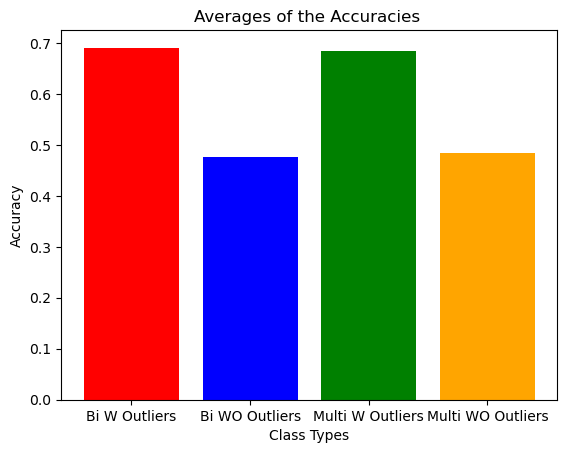

In [11]:
import matplotlib.pyplot as plt
import statistics as st

#binary class with outliers
combined_BWOLY = [accuracy_score(test_BWOLY, prediction_BWOL1), accuracy_score(test_BWOLY, prediction_BWOL2), accuracy_score(test_BWOLY, prediction_BWOL3), accuracy_score(test_BWOLY, prediction_BWOL4), accuracy_score(test_BWOLY, prediction_BWOL5)]
average_BWOLY = np.mean([combined_BWOLY])
print("Binary with Outliers: ",average_BWOLY)

#binary class without outliers
combined_BWTOLY = [accuracy_score(test_BWTOLY, prediction_BWTOL1), accuracy_score(test_BWTOLY, prediction_BWTOL2), accuracy_score(test_BWTOLY, prediction_BWTOL3), accuracy_score(test_BWTOLY, prediction_BWTOL4), accuracy_score(test_BWTOLY, prediction_BWTOL5)]
average_BWTOLY = np.mean([combined_BWTOLY])
print("Binary without Outliers: ", average_BWTOLY)


#multi with outliers
combined_MWOLY = [accuracy_score(test_MWOLY, prediction_MWOL1), accuracy_score(test_MWOLY, prediction_MWOL2), accuracy_score(test_MWOLY, prediction_MWOL3), accuracy_score(test_MWOLY, prediction_MWOL4), accuracy_score(test_MWOLY, prediction_MWOL5), accuracy_score(test_MWOLY, prediction_MWOL6), accuracy_score(test_MWOLY, prediction_MWOL7)]
average_MWOLY = np.mean([combined_MWOLY])
print("Multi with Outliers: ",average_MWOLY)


#multiclass without outliers averages
combined_MWTOLY = [accuracy_score(test_MWTOLY, prediction_MWTOL1)], [accuracy_score(test_MWTOLY, prediction_MWTOL2)], [accuracy_score(test_MWTOLY, prediction_MWTOL3)],[accuracy_score(test_MWTOLY, prediction_MWTOL4)], [accuracy_score(test_MWTOLY, prediction_MWTOL5)], [accuracy_score(test_MWTOLY, prediction_MWTOL6)]   
average_MWTOLY = np.mean([combined_MWTOLY])
print("Multi without Outliers: ",average_MWTOLY)

average_of_all = [average_BWOLY, average_MWTOLY, average_BWTOLY, average_MWOLY]
bar_labels = ["Bi W Outliers","Bi WO Outliers","Multi W Outliers", "Multi WO Outliers"]

plt.bar(bar_labels, average_of_all, color = ["red", "blue", "green", "orange"])



plt.title("Averages of the Accuracies ")
plt.ylabel("Accuracy")
plt.xlabel("Class Types")


plt.show()

